## Testes antes de decidir 

## Tess

In [ ]:
import pandas as pd

tess = pd.read_csv(r'tessqueries.csv')
tess.head()

,intentType,obs_collection,provenance_name,instrument_name,project,filters,wavelength_region,target_name,target_classification,obs_id,...,proposal_type,sequence_number,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,obsid,objID
0,science,TESS,SPOC,Photometer,TESS,TESS,Optical,TESS FFI,NaN,tess-s0086-1-1,...,NaN,86,POLYGON 84.397259 54.220049 84.340478 42.73188...,NaN,NaN,PUBLIC,False,NaN,236870228,700694124
1,science,TESS,SPOC,Photometer,TESS,TESS,Optical,TESS FFI,NaN,tess-s0086-1-2,...,NaN,86,POLYGON 64.081165 53.379423 67.62671 41.711452...,NaN,NaN,PUBLIC,False,NaN,236870229,700703621
2,science,TESS,SPOC,Photometer,TESS,TESS,Optical,TESS FFI,NaN,tess-s0086-1-3,...,NaN,86,POLYGON 56.900467 27.410355 52.298245 38.23203...,NaN,NaN,PUBLIC,False,NaN,236870242,700713800
3,science,TESS,SPOC,Photometer,TESS,TESS,Optical,TESS FFI,NaN,tess-s0086-1-4,...,NaN,86,POLYGON 70.29962 29.735295 67.909289 41.484483...,NaN,NaN,PUBLIC,False,NaN,236870243,700721420
4,science,TESS,SPOC,Photometer,TESS,TESS,Optical,TESS FFI,NaN,tess-s0086-2-1,...,NaN,86,POLYGON 95.427814 77.267546 87.798089 66.01251...,NaN,NaN,PUBLIC,False,NaN,236870245,700730556


In [4]:
tess['dataURL'] # como ta vazio temos de usar o obsid poara fazer query do lightcurve pelo astroquery

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1403   NaN
1404   NaN
1405   NaN
1406   NaN
1407   NaN
Name: dataURL, Length: 1408, dtype: float64

In [5]:
# Calculate missing value proportions and drop columns exceeding threshold
missing_proportions = tess.isnull().mean()
threshold = 0.5  # Set your threshold here

# missing_proportions[missing_proportions > threshold]
tess = tess.drop(columns=missing_proportions[missing_proportions > threshold].index)

tess.columns

Index(['intentType', 'obs_collection', 'provenance_name', 'instrument_name',
       'project', 'filters', 'wavelength_region', 'target_name', 'obs_id',
       's_ra', 's_dec', 'dataproduct_type', 'proposal_pi', 'calib_level',
       't_min', 't_max', 't_exptime', 'em_min', 'em_max', 't_obs_release',
       'sequence_number', 's_region', 'dataRights', 'mtFlag', 'obsid',
       'objID'],
      dtype='object')

In [6]:
# Drop specified columns from tess
columns_to_drop_dataset2 = [
    "intentType", "obs_collection", "provenance_name", "instrument_name", "project",
    "filters", "wavelength_region", "target_classification", "obs_id", "proposal_pi",
    "calib_level", "t_exptime", "obs_title", "t_obs_release", "proposal_id",
    "proposal_type", "sequence_number", "s_region", "jpegURL", "dataRights", "mtFlag",
    "srcDen", "objID","dataproduct_type",'dataURL'
]
# Filter columns to drop based on existing columns in tess
columns_to_drop = [col for col in columns_to_drop_dataset2 if col in tess.columns]
# Drop the columns and assign back to tess
tess = tess.drop(columns=columns_to_drop)

In [7]:
tess.head()

,target_name,s_ra,s_dec,t_min,t_max,em_min,em_max,obsid
0,TESS FFI,75.257379,48.394182,60635.759117,60662.331107,600.0,1000.0,236870228
1,TESS FFI,57.523191,46.001910,60635.759398,60662.330808,600.0,1000.0,236870229
2,TESS FFI,61.742441,34.422100,60635.759793,60662.331209,600.0,1000.0,236870242
3,TESS FFI,76.599717,36.405754,60635.759513,60662.331509,600.0,1000.0,236870243
4,TESS FFI,71.018345,72.117377,60635.757750,60662.329734,600.0,1000.0,236870245


## ALMA


In [8]:
alma = pd.read_csv(r'almaqueries.csv')
alma.head()

,obs_publisher_did,obs_collection,facility_name,instrument_name,obs_id,dataproduct_type,calib_level,collections,target_name,s_ra,...,pub_title,first_author,authors,pub_abstract,publication_year,proposal_abstract,schedblock_name,proposal_authors,sensitivity_10kms,lastModified
0,ADS/JAO.ALMA#2021.1.00869.L,ALMA,JAO,ALMA,uid://A001/X1590/X18b8.source.ad3a-18967.spw.25,cube,2,NaN,ad3a-18967,217.763254,...,NaN,NaN,NaN,NaN,NaN,A radio survey of red giant SiO sources in the...,ad3a-197_b_03_TM1,"Habing, Harm; Quiroga Nunez, Luis Henry; Stroh...",4.271239,2024-08-21T18:10:02.819
1,ADS/JAO.ALMA#2021.1.00869.L,ALMA,JAO,ALMA,uid://A001/X1590/X18b8.source.ad3a-18967.spw.27,cube,2,NaN,ad3a-18967,217.763254,...,NaN,NaN,NaN,NaN,NaN,A radio survey of red giant SiO sources in the...,ad3a-197_b_03_TM1,"Habing, Harm; Quiroga Nunez, Luis Henry; Stroh...",4.251048,2024-08-21T18:10:02.819
2,ADS/JAO.ALMA#2021.1.00869.L,ALMA,JAO,ALMA,uid://A001/X1590/X18b8.source.ad3a-18967.spw.29,cube,2,NaN,ad3a-18967,217.763254,...,NaN,NaN,NaN,NaN,NaN,A radio survey of red giant SiO sources in the...,ad3a-197_b_03_TM1,"Habing, Harm; Quiroga Nunez, Luis Henry; Stroh...",4.264906,2024-08-21T18:10:02.819
3,ADS/JAO.ALMA#2021.1.00869.L,ALMA,JAO,ALMA,uid://A001/X1590/X18b8.source.ad3a-18967.spw.31,cube,2,NaN,ad3a-18967,217.763254,...,NaN,NaN,NaN,NaN,NaN,A radio survey of red giant SiO sources in the...,ad3a-197_b_03_TM1,"Habing, Harm; Quiroga Nunez, Luis Henry; Stroh...",4.183584,2024-08-21T18:10:02.819
4,ADS/JAO.ALMA#2021.1.00869.L,ALMA,JAO,ALMA,uid://A001/X1590/X18b8.source.ad3a-19399.spw.25,cube,2,NaN,ad3a-19399,217.997779,...,NaN,NaN,NaN,NaN,NaN,A radio survey of red giant SiO sources in the...,ad3a-197_b_03_TM1,"Habing, Harm; Quiroga Nunez, Luis Henry; Stroh...",4.271243,2024-08-21T18:10:02.819


In [9]:
# Calculate missing value proportions and drop columns exceeding threshold
missing_proportions = alma.isnull().mean()
threshold = 0.5  # Set your threshold here

missing_proportions[missing_proportions > threshold]
# alma = alma.drop(columns=missing_proportions[missing_proportions > threshold].index)

# alma.columns

columns_to_drop_dataset1 = [
    "obs_publisher_did", "obs_collection", "facility_name", "instrument_name", "obs_id",
    "dataproduct_type", "calib_level", "collections", "s_fov", "s_region", "s_xel1",
    "s_xel2", "em_xel", "t_xel", "pol_xel", "s_resolution", "t_exptime", "t_resolution",
    "em_res_power", "pol_states", "cont_sensitivity_bandwidth", "pwv", "group_ous_uid",
    "member_ous_uid", "asdm_uid", "obs_title", "type", "scan_intent", "science_observation",
    "spatial_scale_max", "qa2_passed", "bib_reference", "science_keyword", "scientific_category",
    "pi_userid", "pi_name", "o_ucd", "access_format", "access_estsize", "proposal_id",
    "data_rights", "gal_longitude", "gal_latitude", "band_list", "em_resolution",
    "bandwidth", "antenna_arrays", "is_mosaic", "obs_release_date", "spatial_resolution",
    "frequency_support", "frequency", "obs_creator_name", "pub_title", "first_author",
    "authors", "pub_abstract", "publication_year", "proposal_abstract", "schedblock_name",
    "proposal_authors", "sensitivity_10kms", "lastModified"
]

# Filter columns to drop based on existing columns in tess
columns_to_drop = [col for col in columns_to_drop_dataset1 if col in alma.columns]
# Drop the columns and assign back to tess
alma = alma.drop(columns=columns_to_drop)



In [10]:
# Assuming your ALMA DataFrame is named df_alma

# Conversion factor: 1 mm = 1,000,000 nm
mm_to_nm = 1e6

# Create the lambda function for conversion
mm_to_nm_lambda = lambda mm: mm * mm_to_nm

# Apply the lambda function to the 'em_min' column to create a new 'em_min_nm' column
if 'em_min' in alma.columns:
    alma['em_min_nm'] = alma['em_min'].apply(mm_to_nm_lambda)
else:
    print("Warning: 'em_min' column not found in df_alma.")

# Apply the lambda function to the 'em_max' column to create a new 'em_max_nm' column
if 'em_max' in alma.columns:
    alma['em_max_nm'] = alma['em_max'].apply(mm_to_nm_lambda)
else:
    print("Warning: 'em_max' column not found in df_alma.")

# You can now work with the wavelength ranges in nanometers in the 'em_min_nm' and 'em_max_nm' columns
print(alma[['em_min', 'em_max', 'em_min_nm', 'em_max_nm']].head())

     em_min    em_max    em_min_nm    em_max_nm
0  0.003525  0.003565  3525.493314  3564.783854
1  0.003491  0.003530  3491.343663  3529.872565
2  0.003445  0.003483  3445.332075  3482.846849
3  0.003408  0.003445  3408.220288  3444.926924
4  0.003525  0.003565  3525.499533  3564.789318


In [11]:
alma.head()

,target_name,s_ra,s_dec,t_min,t_max,em_min,em_max,spectral_resolution,access_url,velocity_resolution,em_min_nm,em_max_nm
0,ad3a-18967,217.763254,-63.110875,59606.408883,59641.333585,0.003525,0.003565,294.677734,https://almascience.org/datalink/sync?ID=uid:/...,1004.271775,3525.493314,3564.783854
1,ad3a-18967,217.763254,-63.110875,59606.408883,59641.333585,0.003491,0.003530,294.677734,https://almascience.org/datalink/sync?ID=uid:/...,1004.271775,3491.343663,3529.872565
2,ad3a-18967,217.763254,-63.110875,59606.408883,59641.333585,0.003445,0.003483,294.677734,https://almascience.org/datalink/sync?ID=uid:/...,1004.271775,3445.332075,3482.846849
3,ad3a-18967,217.763254,-63.110875,59606.408883,59641.333585,0.003408,0.003445,294.677734,https://almascience.org/datalink/sync?ID=uid:/...,1004.271775,3408.220288,3444.926924
4,ad3a-19399,217.997779,-62.310428,59606.415355,59641.340046,0.003525,0.003565,294.677734,https://almascience.org/datalink/sync?ID=uid:/...,1004.271775,3525.499533,3564.789318


## HAWKI


In [12]:
hawki = pd.read_csv(r"vltqueries.csv")
hawki

,OBJECT,RA,DEC,Program_ID,Instrument,Category,Type,Mode,Dataset ID,Release_Date,TPL ID,TPL START,Exptime,filter_lambda_min,filter_lambda_max,Filter,MJD-OBS,Airmass,DIMM Seeing at Start
0,OBJECT,217.252125,-62.695083,299.C-5022(A),HAWKI,ACQUISITION,OBJECT,IMAGE,HAWKI.2017-06-28T03:56:21.604,Jun 28 2018,HAWKI_img_acq_FastPhot,2017-06-28T03:51:02,16.762,2086.0,2105.0,"OPEN,NB2090",57932.164139,1.533,1.08
1,OBJECT,217.252375,-62.695167,299.C-5022(A),HAWKI,ACQUISITION,OBJECT,IMAGE,HAWKI.2017-06-28T01:47:30.092,Jun 28 2018,HAWKI_img_acq_FastPhot,2017-06-28T01:34:24,16.762,2086.0,2105.0,"OPEN,NB2090",57932.074654,1.295,0.95
2,OBJECT,217.252375,-62.695167,299.C-5022(A),HAWKI,ACQUISITION,OBJECT,IMAGE,HAWKI.2017-06-28T01:50:10.810,Jun 28 2018,HAWKI_img_acq_FastPhot,2017-06-28T01:34:24,16.762,2086.0,2105.0,"OPEN,NB2090",57932.076514,1.297,0.96
3,OBJECT,217.252750,-62.695222,299.C-5022(A),HAWKI,ACQUISITION,OBJECT,IMAGE,HAWKI.2017-06-28T03:58:13.314,Jun 28 2018,HAWKI_img_acq_FastPhot,2017-06-28T03:51:02,16.762,2086.0,2105.0,"OPEN,NB2090",57932.165432,1.539,1.22
4,OBJECT,217.252833,-62.695222,60.A-9800(L),HAWKI,ACQUISITION,OBJECT,IMAGE,HAWKI.2017-05-27T22:52:04.495,May 27 2017,HAWKI_img_acq_FastPhot,2017-05-27T22:37:58,16.762,2086.0,2105.0,"OPEN,NB2090",57900.952830,1.712,0.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5878,HEAR_SPEC,217.435000,-62.679639,71.C-0026(A),EFOSC/1.8,CALIB,HEAR_SPEC,SPECTRUM,EFOSC.2003-05-11T06:44:08.275,May 11 2003,EFOSC_spec_cal_Arcs,2003-05-11T06:43:41,0.794,NaN,NaN,FREE,52770.280651,1.360,0.97
5879,V645CEN,217.435000,-62.679667,71.C-0026(A),EFOSC/1.8,SCIENCE,NaN,SPECTRUM,EFOSC.2003-05-11T06:43:05.184,May 10 2004,EFOSC_spec_obs_Spectrum,2003-05-11T06:42:50,9.997,NaN,NaN,FREE,52770.279921,1.358,0.95
5880,ESPRI_1429-6240,217.436458,-62.697833,077.A-9009(A),FEROS,SCIENCE,"OBJECT,WAVE",ECHELLE,FEROS.2006-07-14T23:08:16.338,Jul 14 2007,FEROS_ech_obs_objcal,2006-07-14T23:07:55,1799.999,NaN,NaN,NaN,53930.964078,1.204,-1.00
5881,ESPRI_1429-6240,217.439042,-62.698194,077.A-9009(A),FEROS,SCIENCE,"OBJECT,SKY",ECHELLE,FEROS.2006-07-14T23:39:31.223,Jul 14 2007,FEROS_ech_obs_objsky,2006-07-14T23:39:10,1799.999,NaN,NaN,NaN,53930.985778,1.198,-1.00


In [13]:
hawki = hawki.rename(columns = {'OBJECT': 'target_name','RA':'s_ra', 'DEC':'s_dec'})
hawki.dropna()

,target_name,s_ra,s_dec,Program_ID,Instrument,Category,Type,Mode,Dataset ID,Release_Date,TPL ID,TPL START,Exptime,filter_lambda_min,filter_lambda_max,Filter,MJD-OBS,Airmass,DIMM Seeing at Start
0,OBJECT,217.252125,-62.695083,299.C-5022(A),HAWKI,ACQUISITION,OBJECT,IMAGE,HAWKI.2017-06-28T03:56:21.604,Jun 28 2018,HAWKI_img_acq_FastPhot,2017-06-28T03:51:02,16.762,2086.0,2105.0,"OPEN,NB2090",57932.164139,1.533,1.08
1,OBJECT,217.252375,-62.695167,299.C-5022(A),HAWKI,ACQUISITION,OBJECT,IMAGE,HAWKI.2017-06-28T01:47:30.092,Jun 28 2018,HAWKI_img_acq_FastPhot,2017-06-28T01:34:24,16.762,2086.0,2105.0,"OPEN,NB2090",57932.074654,1.295,0.95
2,OBJECT,217.252375,-62.695167,299.C-5022(A),HAWKI,ACQUISITION,OBJECT,IMAGE,HAWKI.2017-06-28T01:50:10.810,Jun 28 2018,HAWKI_img_acq_FastPhot,2017-06-28T01:34:24,16.762,2086.0,2105.0,"OPEN,NB2090",57932.076514,1.297,0.96
3,OBJECT,217.252750,-62.695222,299.C-5022(A),HAWKI,ACQUISITION,OBJECT,IMAGE,HAWKI.2017-06-28T03:58:13.314,Jun 28 2018,HAWKI_img_acq_FastPhot,2017-06-28T03:51:02,16.762,2086.0,2105.0,"OPEN,NB2090",57932.165432,1.539,1.22
4,OBJECT,217.252833,-62.695222,60.A-9800(L),HAWKI,ACQUISITION,OBJECT,IMAGE,HAWKI.2017-05-27T22:52:04.495,May 27 2017,HAWKI_img_acq_FastPhot,2017-05-27T22:37:58,16.762,2086.0,2105.0,"OPEN,NB2090",57900.952830,1.712,0.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5852,HIP70890,217.430542,-62.680500,077.C-0572(A),SOFI,SCIENCE,OTHER,IMAGE,SOFI.2006-06-22T01:29:47.610,Jun 22 2007,SOFI_img_obs_AutoJitter,2006-06-22T01:16:28,60.000,1505.0,1801.0,"H,OPEN",53908.062357,1.200,-1.00
5870,HIP_70890,217.431792,-62.680361,075.C-0100(A),SOFI,SCIENCE,OTHER,IMAGE,SOFI.2005-06-05T02:17:49.700,Jun 5 2006,SOFI_img_obs_AutoJitter,2005-06-05T02:06:33,60.000,1505.0,1801.0,"H,OPEN",53526.095714,1.198,1.74
5875,HIP_70890,217.433708,-62.678750,075.C-0100(A),SOFI,SCIENCE,OTHER,IMAGE,SOFI.2005-06-05T02:24:28.397,Jun 5 2006,SOFI_img_obs_AutoJitter,2005-06-05T02:06:33,60.000,1505.0,1801.0,"H,OPEN",53526.100329,1.198,1.74
5876,HIP_70890,217.433875,-62.681472,075.C-0100(A),SOFI,SCIENCE,OTHER,IMAGE,SOFI.2005-06-05T02:08:58.565,Jun 5 2006,SOFI_img_obs_AutoJitter,2005-06-05T02:06:33,60.000,1505.0,1801.0,"H,OPEN",53526.089567,1.198,1.70


In [14]:
hawki_prox = hawki[hawki['target_name']== "PROX CENTAURI"]

hawki_prox.head()


,target_name,s_ra,s_dec,Program_ID,Instrument,Category,Type,Mode,Dataset ID,Release_Date,TPL ID,TPL START,Exptime,filter_lambda_min,filter_lambda_max,Filter,MJD-OBS,Airmass,DIMM Seeing at Start
5,PROX CENTAURI,217.252958,-62.695278,299.C-5022(A),HAWKI,SCIENCE,OBJECT,"IMAGE,HIT",HAWKI.2017-06-28T05:15:11.757,Jun 28 2018,HAWKI_img_obs_FastPhot,2017-06-28T04:01:55,28.407,2086.0,2105.0,"OPEN,NB2090",57932.218886,1.877,1.45
6,PROX CENTAURI,217.252958,-62.695278,299.C-5022(A),HAWKI,SCIENCE,OBJECT,"IMAGE,HIT",HAWKI.2017-06-28T05:21:14.741,Jun 28 2018,HAWKI_img_obs_FastPhot,2017-06-28T04:01:55,28.407,2086.0,2105.0,"OPEN,NB2090",57932.223087,1.914,0.95
7,PROX CENTAURI,217.252958,-62.695278,299.C-5022(A),HAWKI,SCIENCE,OBJECT,"IMAGE,HIT",HAWKI.2017-06-28T05:22:45.633,Jun 28 2018,HAWKI_img_obs_FastPhot,2017-06-28T04:01:55,28.407,2086.0,2105.0,"OPEN,NB2090",57932.224139,1.923,1.16
8,PROX CENTAURI,217.252958,-62.695278,299.C-5022(A),HAWKI,SCIENCE,OBJECT,"IMAGE,HIT",HAWKI.2017-06-28T05:19:44.081,Jun 28 2018,HAWKI_img_obs_FastPhot,2017-06-28T04:01:55,28.407,2086.0,2105.0,"OPEN,NB2090",57932.222038,1.904,1.31
9,PROX CENTAURI,217.252958,-62.695278,299.C-5022(A),HAWKI,SCIENCE,OBJECT,"IMAGE,HIT",HAWKI.2017-06-28T05:19:13.860,Jun 28 2018,HAWKI_img_obs_FastPhot,2017-06-28T04:01:55,28.407,2086.0,2105.0,"OPEN,NB2090",57932.221688,1.901,1.31


In [15]:
hawki.dtypes

target_name              object
s_ra                    float64
s_dec                   float64
Program_ID               object
Instrument               object
Category                 object
Type                     object
Mode                     object
Dataset ID               object
Release_Date             object
TPL ID                   object
TPL START                object
Exptime                 float64
filter_lambda_min       float64
filter_lambda_max       float64
Filter                   object
MJD-OBS                 float64
Airmass                 float64
DIMM Seeing at Start    float64
dtype: object

In [16]:
# Fill NaN values with an empty string (or some other appropriate string)
hawki['target_name_processed'] = hawki['target_name'].fillna('')

hawki_prox = hawki[[
    "prox" in name.lower()
    for name in hawki['target_name_processed']
]]

# You can drop the temporary processed column if you don't need it anymore
hawki = hawki.drop(columns=['target_name_processed'], errors='ignore')

hawki_prox

,target_name,s_ra,s_dec,Program_ID,Instrument,Category,Type,Mode,Dataset ID,Release_Date,TPL ID,TPL START,Exptime,filter_lambda_min,filter_lambda_max,Filter,MJD-OBS,Airmass,DIMM Seeing at Start,target_name_processed
5,PROX CENTAURI,217.252958,-62.695278,299.C-5022(A),HAWKI,SCIENCE,OBJECT,"IMAGE,HIT",HAWKI.2017-06-28T05:15:11.757,Jun 28 2018,HAWKI_img_obs_FastPhot,2017-06-28T04:01:55,28.407,2086.0,2105.0,"OPEN,NB2090",57932.218886,1.877,1.45,PROX CENTAURI
6,PROX CENTAURI,217.252958,-62.695278,299.C-5022(A),HAWKI,SCIENCE,OBJECT,"IMAGE,HIT",HAWKI.2017-06-28T05:21:14.741,Jun 28 2018,HAWKI_img_obs_FastPhot,2017-06-28T04:01:55,28.407,2086.0,2105.0,"OPEN,NB2090",57932.223087,1.914,0.95,PROX CENTAURI
7,PROX CENTAURI,217.252958,-62.695278,299.C-5022(A),HAWKI,SCIENCE,OBJECT,"IMAGE,HIT",HAWKI.2017-06-28T05:22:45.633,Jun 28 2018,HAWKI_img_obs_FastPhot,2017-06-28T04:01:55,28.407,2086.0,2105.0,"OPEN,NB2090",57932.224139,1.923,1.16,PROX CENTAURI
8,PROX CENTAURI,217.252958,-62.695278,299.C-5022(A),HAWKI,SCIENCE,OBJECT,"IMAGE,HIT",HAWKI.2017-06-28T05:19:44.081,Jun 28 2018,HAWKI_img_obs_FastPhot,2017-06-28T04:01:55,28.407,2086.0,2105.0,"OPEN,NB2090",57932.222038,1.904,1.31,PROX CENTAURI
9,PROX CENTAURI,217.252958,-62.695278,299.C-5022(A),HAWKI,SCIENCE,OBJECT,"IMAGE,HIT",HAWKI.2017-06-28T05:19:13.860,Jun 28 2018,HAWKI_img_obs_FastPhot,2017-06-28T04:01:55,28.407,2086.0,2105.0,"OPEN,NB2090",57932.221688,1.901,1.31,PROX CENTAURI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5163,GJ551PROXCEN,217.422208,-62.678361,173.C-0606(A),UVES,SCIENCE,"OBJECT,POINT","ECHELLE,ABSORPTION-CELL,SLIC#3",UVES.2004-04-03T06:45:04.547,Aug 23 2005,UVES_red_obs_exp,2004-04-03T06:44:42,780.000,NaN,NaN,"FREE,SHP700",53098.281303,1.272,0.83,GJ551PROXCEN
5170,GJ551PROXCEN,217.422292,-62.678444,173.C-0606(A),UVES,ACQUISITION,SLIT,IMAGE,UVES.2004-04-03T06:58:45.631,Apr 3 2005,UVES_red_obs_exp,2004-04-03T06:44:42,0.010,NaN,NaN,"FREE,SHP700",53098.290806,1.277,0.81,GJ551PROXCEN
5171,GJ551PROXCEN,217.422292,-62.678444,173.C-0606(A),UVES,SCIENCE,"OBJECT,POINT","ECHELLE,ABSORPTION-CELL,SLIC#3",UVES.2004-04-03T06:58:55.065,Aug 23 2005,UVES_red_obs_exp,2004-04-03T06:44:42,780.000,NaN,NaN,"FREE,SHP700",53098.290915,1.277,0.81,GJ551PROXCEN
5179,GJ551PROXCEN,217.422375,-62.678528,173.C-0606(A),UVES,ACQUISITION,SLIT,IMAGE,UVES.2004-04-03T07:12:36.860,Apr 3 2005,UVES_red_obs_exp,2004-04-03T06:44:42,0.010,NaN,NaN,"FREE,SHP700",53098.300427,1.285,0.62,GJ551PROXCEN


In [17]:
columns_to_drop_dataset3 = ['Program_ID', 'Instrument', 'Category', 'Type', 'Mode', 'Dataset ID', 'Release_Date',
                            'TPL ID', 'TPL START', 'Filter', 'Airmass', 'DIMM Seeing at Start']

columns_to_drop = [col for col in columns_to_drop_dataset3 if col in hawki.columns]

hawki = hawki.drop(columns = columns_to_drop)



In [18]:
hawki.head()

,target_name,s_ra,s_dec,Exptime,filter_lambda_min,filter_lambda_max,MJD-OBS
0,OBJECT,217.252125,-62.695083,16.762,2086.0,2105.0,57932.164139
1,OBJECT,217.252375,-62.695167,16.762,2086.0,2105.0,57932.074654
2,OBJECT,217.252375,-62.695167,16.762,2086.0,2105.0,57932.076514
3,OBJECT,217.252750,-62.695222,16.762,2086.0,2105.0,57932.165432
4,OBJECT,217.252833,-62.695222,16.762,2086.0,2105.0,57900.952830


## JWST 

In [199]:
jwst = pd.read_csv(r"jwstqueries.csv")
jwst.head()

,intentType,obs_collection,provenance_name,instrument_name,project,filters,wavelength_region,target_name,target_classification,obs_id,...,proposal_type,sequence_number,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,obsid,objID
0,science,JWST,CALJWST,NIRCAM/GRISM,JWST,F322W2;GRISMR,INFRARED,IRAS-05248-7007,Calibration; Spectrophotometric,jw01076-o113_s000002791_nircam_f322w2-grismr,...,COM,NaN,POLYGON 81.13980245 -70.10170317 81.03323723 -...,mast:JWST/product/jw01076-o113_s000002791_nirc...,mast:JWST/product/jw01076-o113_s000002791_nirc...,PUBLIC,False,NaN,230531914,733838415
1,science,JWST,CALJWST,NIRCAM/GRISM,JWST,F356W;GRISMR,INFRARED,J1120+0641,Galaxy; Quasars,jw01243-o004_s000001452_nircam_f356w-grismr,...,GTO,NaN,POLYGON 170.02444323 6.67214966 169.98792647 6...,mast:JWST/product/jw01243-o004_s000001452_nirc...,mast:JWST/product/jw01243-o004_s000001452_nirc...,PUBLIC,False,NaN,250855097,737546727
2,science,JWST,CALJWST,NIRSPEC/MSA,JWST,F290LP;G395M,INFRARED,CEERS-FULL-V2,NaN,jw04233-o005_s000041321_nirspec_f290lp-g395m,...,GO,NaN,POLYGON 214.838903171 52.8190293 214.838925626...,mast:JWST/product/jw04233-o005_s000041321_nirs...,mast:JWST/product/jw04233-o005_s000041321_nirs...,PUBLIC,False,NaN,232948977,683290106
3,science,JWST,CALJWST,NIRSPEC/MSA,JWST,F290LP;G395H,INFRARED,GOODSS2009,NaN,jw01212-o009_b000000073_nirspec_f290lp-g395h,...,GTO,NaN,POLYGON 53.049465643 -27.718402892 53.05044290...,mast:JWST/product/jw01212-o009_b000000073_nirs...,mast:JWST/product/jw01212-o009_b000000073_nirs...,PUBLIC,False,NaN,232628095,678815355
4,science,JWST,CALJWST,NIRISS/WFSS,JWST,GR150R;F150W,INFRARED,ABELL2744,Clusters of Galaxies; Abell clusters,jw01324-o007_s000001336_niriss_f150w-gr150r,...,ERS,NaN,POLYGON 3.61566792 -30.4145566 3.57252534 -30....,mast:JWST/product/jw01324-o007_s000001336_niri...,mast:JWST/product/jw01324-o007_s000001336_niri...,PUBLIC,False,NaN,236580081,698265567


In [204]:
columns_to_drop_dataset4 = ['intentType', 'obs_collection', 'provenance_name', 'instrument_name', 'project', 'filters', 'wavelength_region', 'target_classification', 'obs_id',
                            'proposal_pi', 'calib_level', 't_exptime', 'obs_title', 't_obs_release', 'proposal_id', 'proposal_type', 'sequence_number', 's_region', 'jpegURL', 
                            'dataRights', 'mtFlag', 'srcDen', 'obsid', 'objID']


columns_to_drop = [col for col in columns_to_drop_dataset4 if col in jwst.columns]
jwst = jwst.drop(columns= columns_to_drop)


In [205]:
jwst = jwst.dropna()

In [69]:
jwst.head()

,target_name,s_ra,s_dec,dataproduct_type,t_min,t_max,em_min,em_max,dataURL
0,IRAS-05248-7007,81.086467,-70.083778,spectrum,59699.159902,59699.208583,2430.0,4013.0,mast:JWST/product/jw01076-o113_s000002791_nirc...
1,J1120+0641,170.006167,6.690083,spectrum,59929.323359,59961.231753,3140.0,3980.0,mast:JWST/product/jw01243-o004_s000001452_nirc...
2,CEERS-FULL-V2,214.909666,52.872408,spectrum,60389.304068,60389.644248,2870.0,5100.0,mast:JWST/product/jw04233-o005_s000041321_nirs...
3,GOODSS2009,53.052791,-27.731936,spectrum,60231.295068,60231.396929,2870.0,5140.0,mast:JWST/product/jw01212-o009_b000000073_nirs...
4,ABELL2744,3.594322,-30.395694,spectrum,60132.437665,60132.500579,800.0,2200.0,mast:JWST/product/jw01324-o007_s000001336_niri...


### tess needs a bit more processing because it misses a crucial column with values, dataURL

In [ ]:
from astroquery.mast import Observations
from astropy.coordinates import SkyCoord
import astropy.units as units


# We dont have the dataURL for Tess , so we need to fecht the the light curves directly from MAST

prox_cent_ra = hawki_prox['RA'].values[0]
print(f'RA of prox centauri: {prox_cent_ra}')
prox_cent_dec = hawki_prox['DEC'].values[0]
print(f'Dec of prox centauri: {prox_cent_dec}')

prox_cent_coordinates = SkyCoord(ra= prox_cent_ra*units.deg, dec = prox_cent_dec*units.deg,frame = 'icrs')  

# We need to define the radius of the search area in degrees, cause most likely the coordinates are not exact

radius = 0.2*units.deg

# Querying:
obs_table= Observations.query_region(prox_cent_coordinates, radius = radius)

# if obs_table is not None and len(obs_table)>0:
#     print(f"Found {len(obs_table)} for prox_cent_coordinates observations in the TESS database.")
#     print(obs_table[['obsid', 'target_name','dataproduct_type','dataURL']])
    

# obs_table = obs_table[prox_col]

# obs_table




In [ ]:
import numpy as np

obs_table_names = np.unique(obs_table['target_name'])
print(obs_table_names)

In [ ]:
# Filter rows where 'target_name' contains "PROX" or "prox" (case-insensitive)
prox_obs_table = obs_table[[("prox" in name.lower()) for name in obs_table['target_name']]]
prox_col = [col for col in tess.columns if col in obs_table.colnames]
# Print the filtered table
proxa = prox_obs_table[prox_col]

proxa_df = proxa.to_pandas()
proxa_df = proxa_df.dropna()
proxa_df['t_min']

---
---
---

- blocking by coords
- sort by blocking
- afterwards, slide and compare by similary measure in a window
- maybe similarity is name + em_min/max (check units)

In [207]:
jwst.columns, hawki.columns, alma.columns, tess.columns

(Index(['target_name', 's_ra', 's_dec', 'dataproduct_type', 't_min', 't_max',
        'em_min', 'em_max', 'dataURL'],
       dtype='object'),
 Index(['target_name', 's_ra', 's_dec', 'Exptime', 'filter_lambda_min',
        'filter_lambda_max', 'MJD-OBS'],
       dtype='object'),
 Index(['target_name', 's_ra', 's_dec', 't_min', 't_max', 'em_min', 'em_max',
        'spectral_resolution', 'access_url', 'velocity_resolution', 'em_min_nm',
        'em_max_nm'],
       dtype='object'),
 Index(['target_name', 's_ra', 's_dec', 't_min', 't_max', 'em_min', 'em_max',
        'obsid'],
       dtype='object'))

In [258]:
# rename filter_lambda_min to em_min
hawki = hawki.rename(columns={'filter_lambda_min': 'em_min', 'filter_lambda_max': 'em_max'})
alma = alma.rename(columns={'access_url': 'dataURL'})

In [ ]:
# think we should drop time columns (and couple others from alma) from all datasets, dont add much
try:
    jwst.drop(columns=['t_min', 't_max'], inplace=True)
    hawki.drop(columns=['Exptime', 'MJD-OBS'], inplace=True)
    alma.drop(columns=['t_min', 't_max', 'em_min_nm', 'em_max_nm'], inplace=True)
    tess.drop(columns=['t_min', 't_max'], inplace=True)
except KeyError as e:
    print()

# add columns with name of dataset so that if we need to edit later its easier to see where its from
jwst_copy['dataset'] = 'JWST'
hawki['dataset'] = 'Hawki'
alma['dataset'] = 'ALMA'
tess['dataset'] = 'TESS'

In [286]:
# merge all
merged_df = pd.concat([jwst, hawki, alma, tess], ignore_index=True)
merged_df

,target_name,s_ra,s_dec,dataproduct_type,em_min,em_max,dataURL,dataset,spectral_resolution,velocity_resolution,obsid
0,IRAS-05248-7007,81.086467,-70.083778,spectrum,2430.0,4013.0,mast:JWST/product/jw01076-o113_s000002791_nirc...,NaN,NaN,NaN,NaN
1,J1120+0641,170.006167,6.690083,spectrum,3140.0,3980.0,mast:JWST/product/jw01243-o004_s000001452_nirc...,NaN,NaN,NaN,NaN
2,CEERS-FULL-V2,214.909666,52.872408,spectrum,2870.0,5100.0,mast:JWST/product/jw04233-o005_s000041321_nirs...,NaN,NaN,NaN,NaN
3,GOODSS2009,53.052791,-27.731936,spectrum,2870.0,5140.0,mast:JWST/product/jw01212-o009_b000000073_nirs...,NaN,NaN,NaN,NaN
4,ABELL2744,3.594322,-30.395694,spectrum,800.0,2200.0,mast:JWST/product/jw01324-o007_s000001336_niri...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
406039,TESS FFI,118.085778,-54.784110,NaN,600.0,1000.0,NaN,TESS,NaN,NaN,247910493.0
406040,TESS FFI,110.714292,-66.099514,NaN,600.0,1000.0,NaN,TESS,NaN,NaN,247913721.0
406041,TESS FFI,87.465791,-59.730241,NaN,600.0,1000.0,NaN,TESS,NaN,NaN,247916479.0
406042,TESS FFI,66.291166,-67.405962,NaN,600.0,1000.0,NaN,TESS,NaN,NaN,247919459.0


<Axes: >

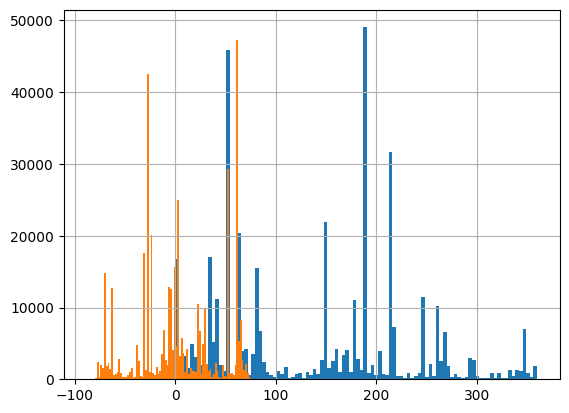

In [287]:
# plot histogram of s_ra and s_dec
merged_df['s_ra'].hist(bins=100),
merged_df['s_dec'].hist(bins=100)

# s_ra is way more spread out so we should sort using that first, and then s_dec

In [288]:
merged_df['blocking'] = merged_df.apply(lambda row: (row['s_ra'], row['s_dec']), axis=1)
# sort merged dataframe by blocking
merged_df = merged_df.sort_values(by='blocking')

In [ ]:
window_size = 1000
half_window = window_size // 2
for row in range(half_window, len(merged_df) - half_window):
    # pseudocode for the blocking identity resolution
    for case in range(-half_window, half_window):
        comparison_row = row + case
        
        # apply similarity measure between row and case (use .iloc)
        # delete if similarity is above threshold